# Validación de Coherencia y Detección de Valores Atípicos
En esta fase se realiza una revisión exhaustiva de los datos para asegurar su consistencia lógica y validez estadística. Se verifican posibles incongruencias entre variables relacionadas, se revisan valores fuera de rango esperado y se identifican valores atípicos (outliers) que podrían distorsionar los análisis posteriores. Además, se confirma que las transformaciones anteriores (como la imputación de valores faltantes) hayan mantenido la integridad del conjunto de datos. Esta etapa es esencial para garantizar la calidad del dataset antes de su análisis estadístico o modelado.

In [1]:
import pandas as pd

# Leer el archivo CSV (ajusta el nombre de archivo según el tuyo)
df = pd.read_csv('3datasetCompleto.csv', sep=';')

# Mostrar las primeras 10 filas de la columna 'Carrera'
print(df[['Carrera']].head(10))


                                             Carrera
0                                              Arqui
1                               medicina veterinaria
2                         Administración de Empresas
3                         Administracion de Empresas
4                                          Auditoría
5  Profesorado en enseñanza media lengua y litera...
6                                 Contaduría publica
7                                 Física Matemáticas
8                     Contadoria pública y auditoria
9   Licenciatura en las ciencias economico contables


Se observa que las carreras no están escritas en un estándar adecuado, además de que deben codificarse para poder usarlas en el entrenamiento del modelo que se quiera. **Debido a que este campo fue digitado por el encuestado se tiene una gran cantidad de datos ambiguos, otros donde solo se tiene la unidad academémica en lugar de la carrerao o bien, datos equivocados**.

Por tal razon se toma la decisión de eliminar la columna de Carrera, a continuación se adjuntar capturas para justificar está decisión:

![Imagen](im1Referencia.png)

![Imagen](im2Referencia.png)

![Imagen](im3Referencia.png)

![Imagen](im4Referencia.png)

![Imagen](im5Referencia.png)

In [2]:
df = df.drop(columns=['Carrera'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7819 entries, 0 to 7818
Data columns (total 78 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Trabajo                                                        7819 non-null   int64  
 1   Sexo                                                           7819 non-null   int64  
 2   Religion                                                       7819 non-null   int64  
 3   Etnia                                                          7819 non-null   int64  
 4   EstCivil                                                       7819 non-null   int64  
 5   edad                                                           7819 non-null   int64  
 6   Terapia                                                        7819 non-null   int64  
 7   TrataPsi                                                    

## Identificación de valores atípicos

Para el tratamiento de Valores Atípicos se puede optar por alguno de los siguientes enfoques:

1. **Eliminación del Valor Atípico**

> Cuándo se aplica: Cuando se identifica que el valor no refleja la realidad y proviene de un error de captura o ingreso (error artificial).

> Ejemplo: Edad registrada como 999 o valores imposibles como -5 en una variable de escala positiva.
   
> Ventaja: Limpieza directa del ruido en los datos.
  
> Desventaja: Se pierde información, especialmente si hay pocos datos.

3. **Transformación del Valor Atípico**

>Cuándo se aplica: Cuando los outliers son reales pero se desea reducir su impacto.

>Ejemplo: Aplicar logaritmos (log(x+1)), raíz cuadrada (sqrt(x)), o escalado robusto.

>Ventaja: Conserva todos los datos.

>Desventaja: Puede hacer menos interpretable el modelo si no se transforma de nuevo al final.

3. **Imputación de un Valor Nuevo**

>Cuándo se aplica: Cuando el valor atípico se considera incorrecto y se prefiere sustituirlo por una estimación.

>Ejemplo: Sustituir con la media, mediana o una predicción basada en otras variables.

>Ventaja: Conserva la estructura del dataset sin perder filas.

>Desventaja: Introduce un valor artificial que podría sesgar el análisis.


Primero se empezará con análisis preliminar estadístico.

In [3]:
df.describe()

,Trabajo,Sexo,Religion,Etnia,EstCivil,edad,Terapia,TrataPsi,¿Tienehijos,UnAca,...,hiaff,loaff,hifunc,lofunc,hiaffect,loaffect,hifunct,lofunct,mhc_dx,phq_non_null_count
count,7819.000000,7819.000000,7819.000000,7819.000000,7819.000000,7819.000000,7819.000000,7819.000000,7819.000000,7819.000000,...,7819.000000,7819.000000,7819.000000,7819.000000,7819.00000,7819.000000,7819.000000,7819.000000,7819.000000,7819.000000
mean,1.229441,1.620284,2.370636,1.364625,2.775930,23.394296,0.114976,0.293516,0.102187,6.329838,...,0.460161,0.780535,1.447883,4.614784,0.27446,0.413608,0.067656,0.376902,0.773884,8.999744
std,0.871097,0.492671,2.075941,0.519935,2.881328,5.428262,0.319014,0.517707,0.302913,4.042375,...,0.851942,1.069675,2.157981,3.130441,0.44627,0.492511,0.251170,0.484641,0.545714,0.015992
min,0.000000,1.000000,1.000000,1.000000,1.000000,17.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,8.000000
25%,0.000000,1.000000,1.000000,1.000000,1.000000,20.000000,0.000000,0.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,9.000000
50%,2.000000,2.000000,2.000000,1.000000,1.000000,22.000000,0.000000,0.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,4.000000,0.00000,0.000000,0.000000,0.000000,1.000000,9.000000
75%,2.000000,2.000000,2.000000,2.000000,3.000000,25.000000,0.000000,1.000000,0.000000,9.000000,...,1.000000,1.000000,2.000000,7.000000,1.00000,1.000000,0.000000,1.000000,1.000000,9.000000
max,2.000000,3.000000,8.000000,5.000000,8.000000,69.000000,1.000000,2.000000,1.000000,19.000000,...,3.000000,3.000000,11.000000,11.000000,1.00000,1.000000,1.000000,1.000000,2.000000,9.000000


Se explica brevemente la información obtenida y su relevancia para el análisis de datos:

| Fila      | Significado                                                                                                                |
| --------- | -------------------------------------------------------------------------------------------------------------------------- |
| **count** | Número de valores no nulos por columna. Note como coinciden los valores, lo que indica que tenemos todos los datos completos.|
| **mean**  | Promedio de los valores numéricos en la columna. Es útil para conocer la tendencia central.                                |
| **std**   | Desviación estándar: indica la dispersión de los valores respecto a la media. Valores más altos implican más variabilidad. |
| **min**   | Valor mínimo encontrado en esa columna.                                                                                    |
| **25%**   | Primer cuartil (Q1): el 25% de los valores son menores o iguales a este valor.                                             |
| **50%**   | Mediana (Q2): el valor central cuando los datos están ordenados. El 50% está por debajo y 50% por encima.                  |
| **75%**   | Tercer cuartil (Q3): el 75% de los valores son menores o iguales a este valor.                                             |
| **max**   | Valor máximo encontrado en la columna.                                                                                     |


## Identificación visual de outliers

Se procede a graficar cada columna y su analisis estádistico para determinar valores atípicos y tratarlos así como también interpretar los valores obtenidos.

Se va utilizar un **Boxplot**, o también conocido como gráfica de cajas y bigotes. 

La **"Caja"** representa aproximadamente el 50% de los datos conectrados alrededor de la media. 

La línea que parte la caja es la **mediana** (valor central de datos) y sirve para ver si tenemos simetría en la "caja".

Las líneas perpendiculares son los **bigotes** y representan el otro 50% de los datos; Se distribuyen como el 25% más pequeño y el 25% más grande según corresponda al bigote inferior o superior.

Los **puntos** son los valores que se salen de la media y son los que se van a analizar como atípicos.

In [4]:
#Importar para grafícar
import matplotlib.pyplot as plt
import seaborn as sns
print("Listo")

Listo


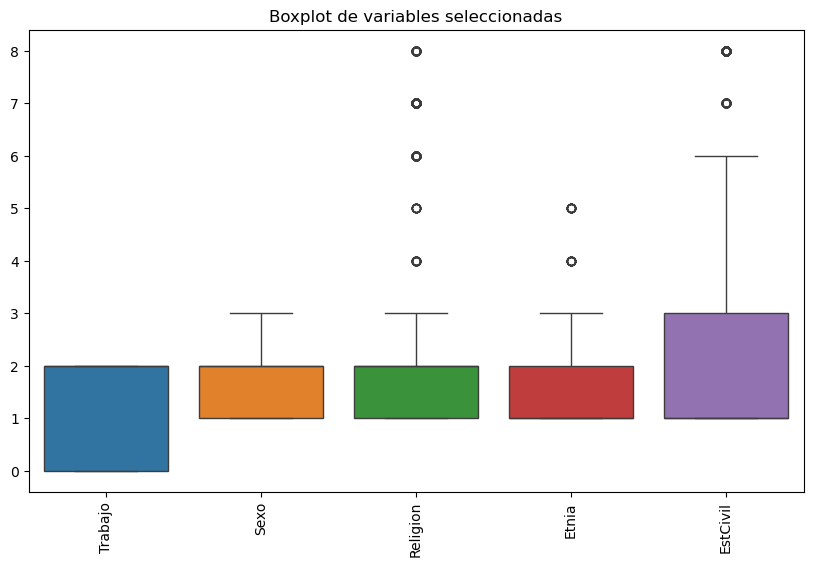

,Trabajo,Sexo,Religion,Etnia,EstCivil
count,7819.000000,7819.000000,7819.000000,7819.000000,7819.000000
mean,1.229441,1.620284,2.370636,1.364625,2.775930
std,0.871097,0.492671,2.075941,0.519935,2.881328
min,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,1.000000
75%,2.000000,2.000000,2.000000,2.000000,3.000000
max,2.000000,3.000000,8.000000,5.000000,8.000000


In [5]:
# Lista de columnas que quieres graficar
columnas_especificas = ['Trabajo', 'Sexo', 'Religion','Etnia','EstCivil']

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[columnas_especificas])
plt.xticks(rotation=90)
plt.title("Boxplot de variables seleccionadas")
plt.show()

df[columnas_especificas ].describe()


## Análisis del gráfico
La variable trabajo no presenta valores atípicos, de hecho vemos una conectracxión simetrica de los datos. Por otro lado; sexo, religión y etnia presentan una concentración similiar de la media, no obstante, vemos que las ultimas dos presentan valores atípicos extremos. Finalmente el EstCivilpresenta mayor variación e igualmente valores atípicos.

Ninguna variable tiene valores por debajo de la media.

## Análisis estadístico

### **1. `Trabajo` (Situación laboral)**

Valores posibles:

* 0 = Jornada completa
* 1 = Medio tiempo
* 2 = Emprendimiento

**Resumen:**

* `min`: 0
* `max`: 2
* `mean`: 1.23
* `50%` (mediana): 2
* `std`: 0.87

**Interpretación:**

* Todos los valores están dentro del rango válido (0–2), por lo tanto **no hay outliers numéricos**.
* La mediana es 2 (Emprendimiento), lo que indica que **la mitad trabaja por cuenta propia** o más.
* La media de 1.23 sugiere una distribución **ligeramente sesgada hacia el medio tiempo (1)**.


### **2. `Sexo`**

Valores posibles:

* 1 = Hombre
* 2 = Mujer
* 3 = Prefiero no decirlo

**Resumen:**

* `min`: 1
* `max`: 3
* `mean`: 1.62
* `50%`: 2
* `std`: 0.49

**Interpretación:**

* Sin valores fuera del rango (1–3), **no hay outliers**.
* Mediana = 2, es decir, **la mayoría se identifica como mujer**.
* La media de 1.62 está cerca de 2, lo que **refuerza esa predominancia**.


### **3. `Religion`**

Valores posibles: 1–8

* 1 = Católica
* 2 = Evangélica
* ...
* 8 = Otra

**Resumen:**

* `min`: 1
* `max`: 8
* `mean`: 2.37
* `50%`: 2
* `std`: 2.08

**Interpretación:**

* Todos los valores están dentro del rango permitido.
* Mediana = 2 → mayoría evangélica.
* Media cercana a 2.4, lo cual es lógico considerando muchas personas entre católica y evangélica.
* Alta desviación estándar **por la variedad de respuestas religiosas** (8 categorías).


### **4. `Etnia`**

Valores posibles: 1–5

* 1 = Mestiza/ladina
* 2 = Maya
* ...

**Resumen:**

* `min`: 1
* `max`: 5
* `mean`: 1.36
* `50%`: 1
* `std`: 0.52

**Interpretación:**

* Sin valores fuera de rango.
* Mediana = 1 → mayoría mestiza o ladina.
* Baja desviación estándar → **poca diversidad étnica** en el conjunto.

### **5. `EstCivil` (Estado Civil)**

Valores posibles: 1–8

* 1 = Soltera(o)
* 2 = Unida(o)
* …
* 8 = Noviazgo

**Resumen:**

* `min`: 1
* `max`: 8
* `mean`: 2.78
* `50%`: 1
* `std`: 2.88 ← **alta**

**Interpretación:**

* Todos los valores están dentro del rango válido.
* Mediana = 1 → mayoría soltera(o).
* Alta desviación estándar = mucha variabilidad en los estados civiles.

### Conclusiones Relevantes

* No hay **valores fuera de rango** (outliers artificiales).
* `EstCivil` y `Religion` muestran **alta dispersión**, indicando diversidad de respuestas.


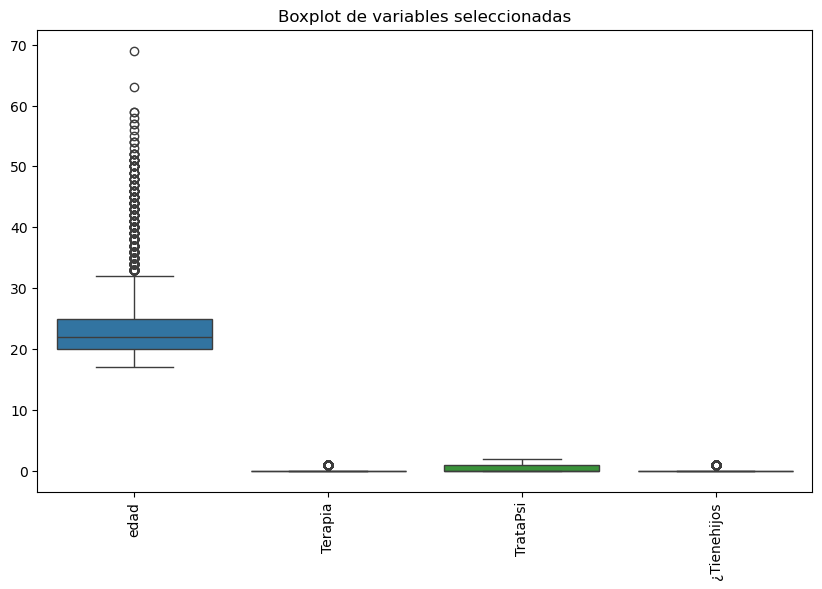

,edad,Terapia,TrataPsi,¿Tienehijos
count,7819.000000,7819.000000,7819.000000,7819.000000
mean,23.394296,0.114976,0.293516,0.102187
std,5.428262,0.319014,0.517707,0.302913
min,17.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000
50%,22.000000,0.000000,0.000000,0.000000
75%,25.000000,0.000000,1.000000,0.000000
max,69.000000,1.000000,2.000000,1.000000


In [6]:
# Lista de columnas que quieres graficar
columnas_especificas = ['edad', 'Terapia', 'TrataPsi','¿Tienehijos']

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[columnas_especificas])
plt.xticks(rotation=90)
plt.title("Boxplot de variables seleccionadas")
plt.show()

df[columnas_especificas ].describe()

## Análisis del gráfico
La variable edad presenta valores concentrados al rededor de entre 20 y 30 años con mayor tendencia a los 20. Existe presencia de valore atípicos bastante elevados.

Las demás variables no presentan mayor variación ni valores fuera de rango tan evidentes.

Ninguna variable tiene valores por debajo de la media

## Análisis estadístico

### **Edad**

* **count = 7819**: Todos los encuestados respondieron su edad.
* **mean = 23.39**: Edad promedio es de aproximadamente 23 años.
* **std = 5.43**: Moderada dispersión; hay variedad de edades pero no extrema.
* **min = 17**, **max = 69**: El rango de edad va desde 17 hasta 69 años, es aceptable esos valores altos.
* **25% = 20**, **50% = 22**, **75% = 25**: El 75% tiene 25 años o menos. Es una población joven.

### **Terapia**

* **0 = No**, **1 = Sí**
* **mean = 0.114**: Muy pocos están en terapia (\~11%).
* **std = 0.319**: Baja variabilidad.
* **75% = 0**: Al menos el 75% de la muestra no recibe terapia.
*Distribución muy sesgada hacia el “No”.*

### **TrataPsi** (Tratamiento psicológico en últimos 3 meses)

* **Valores: 0 = No, 1 = Sí, 2 = Sí, estoy en proceso psicoterapéutico**
* **mean = 0.293**, **std = 0.517**: Hay algo más de variabilidad.
* **50% = 0**, **75% = 1**: La mitad no ha asistido, pero entre el 50% y 75% hay quienes sí.
* **max = 2**: Confirmamos que hay respuestas en las tres categorías.

### **¿Tienehijos**

* **0 = No**, **1 = Sí**
* **mean = 0.102**: Solo \~10% tiene hijos.
* **std = 0.30**, **max = 1**: Todo bien codificado.
* **75% = 0**: Hasta el tercer cuartil, la mayoría no tiene hijos.
* Distribución sesgada hacia "No". Podría tener valor predictivo según el modelo.*


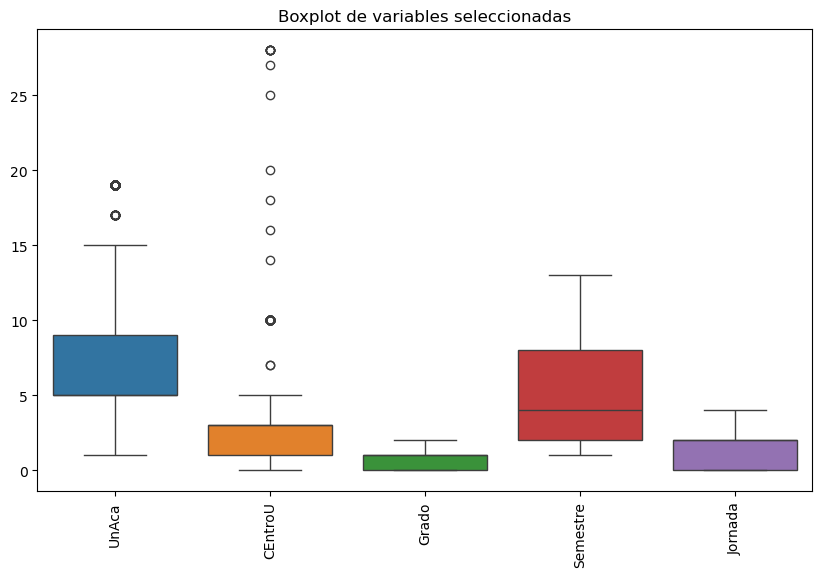

,UnAca,CEntroU,Grado,Semestre,Jornada
count,7819.000000,7819.000000,7819.000000,7819.000000,7819.000000
mean,6.329838,2.636910,0.742167,5.025323,1.495843
std,4.042375,1.843527,0.438346,2.946547,1.053847
min,1.000000,0.000000,0.000000,1.000000,0.000000
25%,5.000000,1.000000,0.000000,2.000000,0.000000
50%,5.000000,3.000000,1.000000,4.000000,2.000000
75%,9.000000,3.000000,1.000000,8.000000,2.000000
max,19.000000,28.000000,2.000000,13.000000,4.000000


In [7]:
# Lista de columnas que quieres graficar
columnas_especificas = ['UnAca', 'CEntroU', 'Grado','Semestre','Jornada']

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[columnas_especificas])
plt.xticks(rotation=90)
plt.title("Boxplot de variables seleccionadas")
plt.show()

df[columnas_especificas ].describe()


## Análisis del gráfico
La variable UnAca presenta simetría, tiene valores atípicos relativamente bajos. Presenta valores por debajo de la media.

CEntroU presenta muchos valores atípicos por encima de la media; tambien se observa presencia de valores por debajo de la media.

Grado no presenta valores atípicos y es bastante simétrica.

Semestre y Jornada tampoco presentan valores atípicos; Semestre muestra algunos valores por debajo de la media y se nota una tendencia hacia valores más pequeños. Por otro lado, Jornada no presenta valores por debajo de la media y presenta mayor simetría.

## Análisis estadístico
### Variable: UnAca – Unidad Académica
* Media: 6.33 → En promedio, los estudiantes pertenecen a la unidad 6: Ciencias Jurídicas y Sociales.

* Mediana (50%): 5.0 → La mitad está en unidades con código 5 o inferior (como Ciencias Económicas).

* Máximo: 19 → Hay estudiantes en unidades hasta el código 19: Otra.

* Observación: Existe una buena dispersión entre facultades (std = 4.04), pero la mayoría se concentra en facultades con códigos bajos (1-6).

### Variable: CEntroU – Centro Universitario
* Media: 2.64 → Promedio cercano al código 2: Humanidades, Sedes Departamentales.

* Máximo: 28 → Hay registros clasificados como "Otro".

* Std (1.84) → Alta dispersión: hay representación en muchos centros distintos.

* Mediana: 3.0 → Centro Universitario de Occidente (CUNOC), uno de los más grandes del país.

### Variable: Grado – Nivel Académico
* Media: 0.74 → Promedio cercano a 1: Grado (licenciaturas e ingenierías).

* Mediana: 1.0 → La mayoría de estudiantes están en programas de grado.

* Distribución: Muchos están en 0 (pregrado) y 1 (grado). Menos en 2 (postgrado), lo que concuerda con lo esperado en población general.

### Variable: Semestre
* Media: 5.02 → En promedio, los estudiantes están en quinto semestre.

* Mediana: 4.0 → La mitad está en cuarto semestre o menos.

* Máximo: 13 → Hay casos con más semestres de los habituales (posiblemente repitentes o carreras largas).

* Distribución balanceada, aunque con más alumnos en primeros semestres.

### Variable: Jornada
* Media: 1.50 → Promedio entre Vespertina (1) y Nocturna (2).

* Mediana: 2.0 → La jornada más común es Nocturna.

* Máximo: 4 → Algunos están en cierre de pensum, una etapa especial.

* Observación: Gran variedad de horarios, aunque predominan horarios fuera de la mañana.

**Conclusiones generales:**

> El dataset tiene una distribución razonable y completa en todas las variables (no hay valores nulos en las 5).

> La mayoría de estudiantes están en facultades y centros grandes, en grados académicos intermedios, y en semestres medios.

> Hay diversidad en la jornada, lo que sugiere inclusión de estudiantes que estudian en distintos momentos del día.

> El rango de valores en Semestre y Jornada sugiere que no hay errores (outliers).

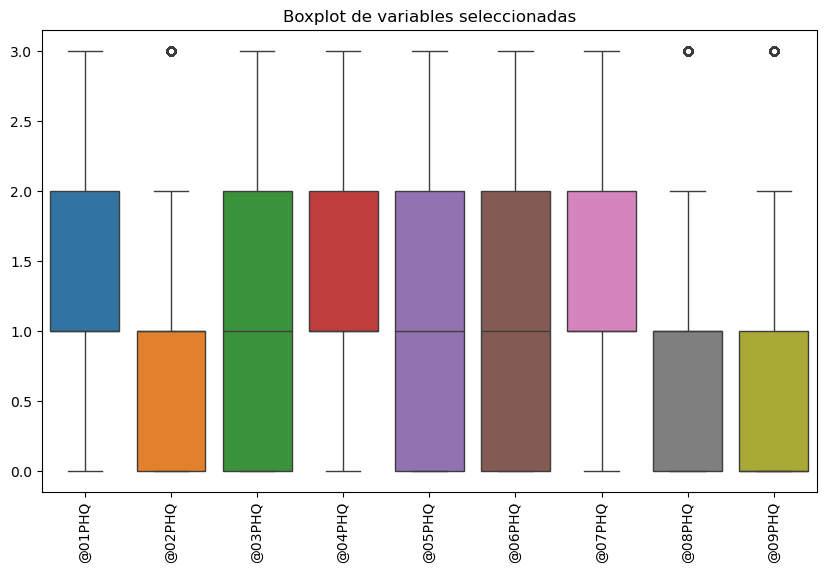

,@01PHQ,@02PHQ,@03PHQ,@04PHQ,@05PHQ,@06PHQ,@07PHQ,@08PHQ,@09PHQ
count,7819.000000,7819.000000,7819.000000,7819.000000,7819.000000,7819.000000,7819.000000,7819.000000,7819.000000
mean,1.188771,1.081724,1.218954,1.568487,1.188259,1.024044,1.331244,0.949610,0.473846
std,0.866607,0.885832,1.084505,0.932080,1.066531,1.008247,0.960600,0.916726,0.842207
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [9]:
# Lista de columnas que quieres graficar
columnas_especificas = ['@01PHQ', '@02PHQ', '@03PHQ','@04PHQ','@05PHQ','@06PHQ','@07PHQ','@08PHQ','@09PHQ']

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[columnas_especificas])
plt.xticks(rotation=90)
plt.title("Boxplot de variables seleccionadas")
plt.show()

df[columnas_especificas ].describe()


### Análisis del gráfico

Estas preguntas corresponden un instrumento multipropósito para la detección, diagnóstico, monitoreo y medición de la gravedad de la depresión.
Consta de 9 preguntas con tres posibles respuestas:
| Valor | Significado                 |
| ----- | --------------------------- |
| 0     | Nunca / Nada                |
| 1     | Varios días                 |
| 2     | Más de la mitad de los días |
| 3     | Casi todos los días         |

Los ítems del PHQ-9 son los siguientes:

@01PHQ – Poco interés o placer en hacer cosas

@02PHQ – Sentirse decaído(a), deprimido(a) o sin esperanza

@03PHQ – Dificultad para conciliar o mantener el sueño, o dormir demasiado

@04PHQ – Cansancio o falta de energía

@05PHQ – Falta de apetito o comer en exceso

@06PHQ – Sentirse mal consigo mismo, fracasado o haber defraudado a su familia

@07PHQ – Dificultad para concentrarse en actividades cotidianas

@08PHQ – Moverse o hablar tan despacio que los demás lo noten, o lo opuesto: estar muy inquieto

@09PHQ – Pensamientos de que estaría mejor muerto(a) o de hacerse daño


En el **gráfico** se puede observar presencia de valores atípicos pero que siguen dentro del rango permitido, dada su relevancia sobre los datos se conservan todos los datos.  Otra observación es que se muestra una gran simetría concentrada en la media de los datos.

### Análisis estadístico

**Rango:** Todos los ítems cumplen el rango esperado 0–3 → no hay valores fuera de escala.

**Media:** Entre 0.47 y 1.56, lo que indica que en promedio los síntomas están en la categoría "Varios días".

**Mediana (50%):** Para la mayoría de ítems es 1 → la mitad de los encuestados presenta los síntomas varios días.

**@09PHQ (pensamientos de autolesión)** tiene mediana 0, lo que indica que la mayoría no los presenta.

> Ítem más frecuente: @04PHQ (cansancio) tiene la media más alta (1.56) → síntoma más común.

> Ítem menos frecuente: @09PHQ (pensamientos de autolesión) con media 0.47, mediana 0 → síntoma más raro pero clínicamente relevante.

> Dispersión (std): Entre 0.84 y 1.08, lo que indica variabilidad moderada → algunos casos reportan síntomas severos (3).

**Conclusiones descriptivas:**

* La mayoría de la población encuestada presenta síntomas depresivos leves, con predominio de cansancio y falta de energía.

* Problemas de sueño y sentimientos de desánimo también son comunes.

* Pensamientos autodestructivos son poco frecuentes, pero están presentes en una minoría (máximo = 3).

* No se detectan valores atípicos artificiales, y la distribución respeta la escala del instrumento.

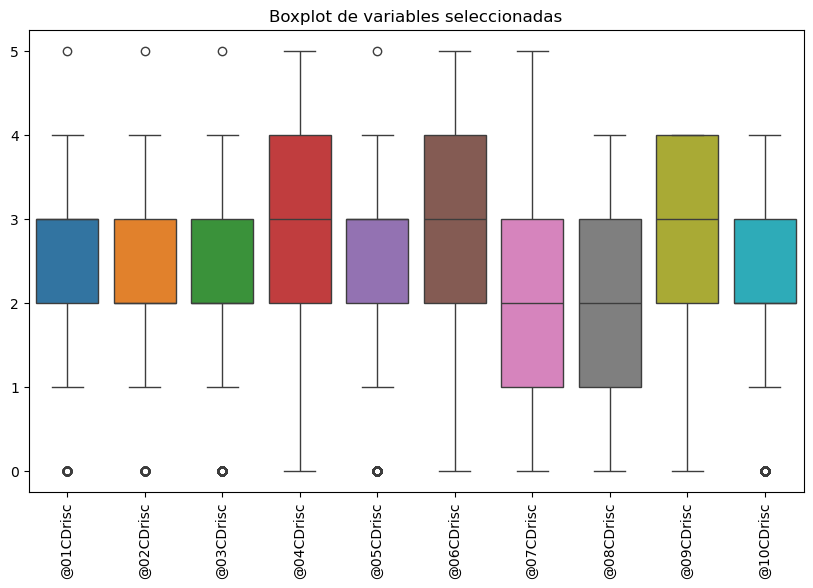

,@01CDrisc,@02CDrisc,@03CDrisc,@04CDrisc,@05CDrisc,@06CDrisc,@07CDrisc,@08CDrisc,@09CDrisc,@10CDrisc
count,7819.000000,7819.000000,7819.000000,7819.000000,7819.000000,7819.000000,7819.000000,7819.000000,7819.000000,7819.000000
mean,2.668628,2.439442,2.462591,2.861491,2.650850,2.950377,2.157565,2.140811,2.692544,2.287249
std,0.932515,0.853871,1.116850,1.037355,1.051551,1.004514,1.096162,1.110887,1.070361,1.122392
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000
50%,3.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,2.000000,3.000000,2.000000
75%,3.000000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,3.000000,4.000000,3.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000


In [11]:
# Lista de columnas que quieres graficar
columnas_especificas = ['@01CDrisc', '@02CDrisc', '@03CDrisc','@04CDrisc','@05CDrisc','@06CDrisc',
                        '@07CDrisc','@08CDrisc','@09CDrisc','@10CDrisc']

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[columnas_especificas])
plt.xticks(rotation=90)
plt.title("Boxplot de variables seleccionadas")
plt.show()

df[columnas_especificas ].describe()

### Análisis del gráfico

El **CD-RISC (Connor-Davidson Resilience Scale)** evalúa la capacidad de una persona para afrontar situaciones difíciles y recuperarse de ellas. 
La escala que muestras parece ser la CD-RISC de 10 ítems, con valores de 0 a 5, donde un valor mayor indica mayor resiliencia:
| Valor | Significado                 |
| ----- | --------------------------- |
| 0     | Nada cierto               |
| 1     | Rara vez cierto                |
| 2     | A veces cierto |
| 3     | A menudo cierto         |
| 4     | Casi siempre cierto         |
| 5     | Siempre cierto         |

Aunque varía según la adaptación, típicamente evalúan:

@01CDrisc – Capacidad de adaptarse a cambios

@02CDrisc – Manejo de presiones y situaciones difíciles

@03CDrisc – Recuperación tras enfermedades o dificultades

@04CDrisc – Mantener el enfoque bajo estrés

@05CDrisc – Confianza en la capacidad propia para superar problemas

@06CDrisc – Ver el lado positivo incluso en la adversidad

@07CDrisc – Control emocional en situaciones difíciles

@08CDrisc – Perseverancia ante fracasos

@09CDrisc – Capacidad de superar el dolor emocional

@10CDrisc – Creencia en poder manejar lo que venga


En el **gráfico** se puede observar presencia de valores atípicos pero que siguen dentro del rango permitido, dada su relevancia sobre los datos se conservan todos los datos.  Otra observación es que se muestra una gran simetría concentrada en la media de los datos.

### Análisis estadístico

**Rango:** 0–5 (excepto ítems 7–10 que llegan a 4) → los datos respetan el rango, no hay errores de codificación.

**Medias:** Oscilan entre 2.14 y 2.95, indicando resiliencia moderada en promedio.

**Más alta:** @06CDrisc (2.95) → tienden a ver el lado positivo.

**Más baja:** @08CDrisc (2.14) → perseverancia ante fracasos es la más débil.

**Medianas (50%):** La mayoría están en 2 o 3, reflejando resiliencia media.

**Dispersión (std ~1.0):** Hay diversidad de respuestas; algunos puntúan muy bajo (0) y otros alto (4–5).

> Valores atípicos: Algunos 0 indican baja resiliencia; Algunos 5 en ítems iniciales muestran muy alta resiliencia.

**Conclusiones descriptivas**
* La muestra presenta resiliencia general media, con puntos fuertes en optimismo y manejo del estrés.

* Las debilidades se encuentran en perseverancia y recuperación tras fracasos.

* No hay errores de codificación ni valores fuera de rango.

* Este perfil es coherente con población joven universitaria, donde las habilidades de afrontamiento están en desarrollo.

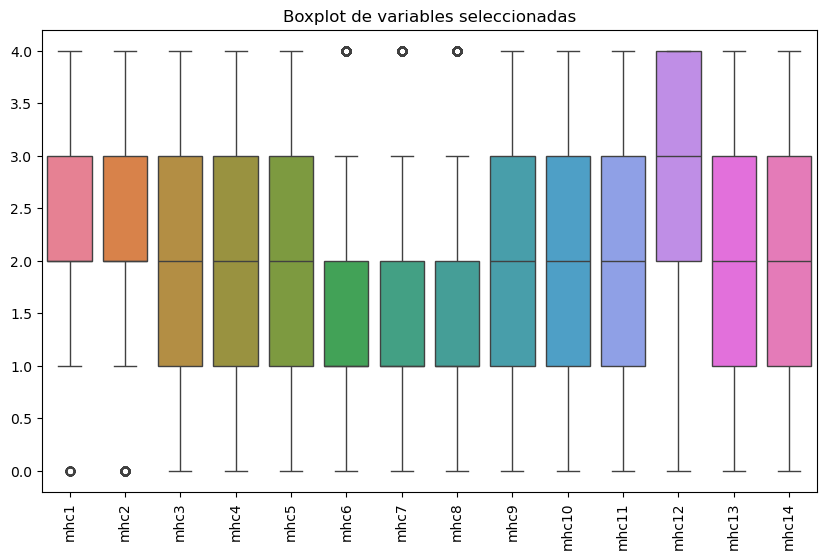

,mhc1,mhc2,mhc3,mhc4,mhc5,mhc6,mhc7,mhc8,mhc9,mhc10,mhc11,mhc12,mhc13,mhc14
count,7819.000000,7819.000000,7819.000000,7819.000000,7819.000000,7819.000000,7819.000000,7819.000000,7819.000000,7819.000000,7819.000000,7819.000000,7819.000000,7819.000000
mean,2.325873,2.465021,2.195805,2.202328,1.961632,1.272797,1.611459,1.280854,2.261798,2.023916,2.109093,2.672592,2.010871,2.365520
std,0.951341,1.078831,1.104725,1.223853,1.248611,1.007336,0.912493,0.872628,1.138475,1.099927,1.065875,1.055013,1.139540,1.203694
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [12]:
# Lista de columnas que quieres graficar
columnas_especificas = ['mhc1', 'mhc2', 'mhc3','mhc4','mhc5','mhc6',
                        'mhc7','mhc8','mhc9','mhc10','mhc11','mhc12',
                       'mhc13','mhc14']

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[columnas_especificas])
plt.xticks(rotation=90)
plt.title("Boxplot de variables seleccionadas")
plt.show()

df[columnas_especificas ].describe()

### Análisis del gráfico

Continuo de Salud Mental (MHC-SF),  es una escala que mide el bienestar emocional. Se ha traducido a varios idiomas y se ha evaluado psicométricamente. Evalúan bienestar emocional, social y psicológico. Por lo general, cada ítem se califica en una escala de 0 a 4, donde valores más altos indican mayor bienestar.


Los 14 ítems suelen agruparse así:

* Bienestar Emocional (Emotional Well-Being, EWB)
    * mhc1 – Sentirse feliz
    * mhc2 – Sentirse interesado en la vida
    * mhc3 – Sentirse satisfecho con la vida

* Bienestar Social (Social Well-Being, SWB)
    * mhc4 – Sentir que contribuye a la sociedad
    * mhc5 – Sentir que su vida tiene sentido en la sociedad
    * mhc6 – Sentir que la sociedad va en buena dirección
    * mhc7 – Sentir que pertenece a una comunidad
    * mhc8 – Sentir que la sociedad le reconoce

* Bienestar Psicológico (Psychological Well-Being, PWB)
    * mhc9 – Sentirse capaz de manejar responsabilidades
    * mhc10 – Sentir que crece como persona
    * mhc11 – Tener relaciones positivas con otros
    * mhc12 – Sentirse autónomo en sus decisiones
    * mhc13 – Tener propósito en la vida
    * mhc14 – Sentir que puede aceptar sus virtudes y defectos

(Esta distribución puede variar ligeramente según la adaptación local, pero es la estándar de MHC-14).


En el **gráfico** se puede observar presencia de valores atípicos pero que siguen dentro del rango permitido, dada su relevancia sobre los datos se conservan todos los datos.  Otra observación es que se muestra una gran simetría concentrada en la media de los datos.

### Análisis estadístico

**Rango:** 0 a 4 → Los datos respetan la escala, no hay errores de codificación.

**Medias:** Oscilan entre 1.27 y 2.67 → bienestar bajo a moderado en promedio.

**Más alto:** mhc12 (2.67) → autonomía / sentirse capaz de decidir.

**Más bajo:** mhc6 (1.27) y mhc8 (1.28) → baja percepción positiva de la sociedad / reconocimiento social.

**Medianas (50%):** 
> Mayoría de ítems con mediana 2 → “a veces” experimentan bienestar.
> Ítems sociales (mhc6, mhc7, mhc8) tienen mediana 1 → indicando menor integración o reconocimiento social.

**Dispersión (std ~1.0):** Moderada, indica diversidad entre personas con alto y bajo bienestar.

**Conclusiones descriptivas:**
* La población muestra bienestar emocional y psicológico moderado, pero bienestar social bajo.

* La percepción más baja está en aceptación social y reconocimiento (mhc6 y mhc8).

* No hay valores fuera de rango → el bloque está limpio para análisis.

* Este perfil es consistente con jóvenes universitarios, que suelen puntuar más alto en autonomía que en percepción social.



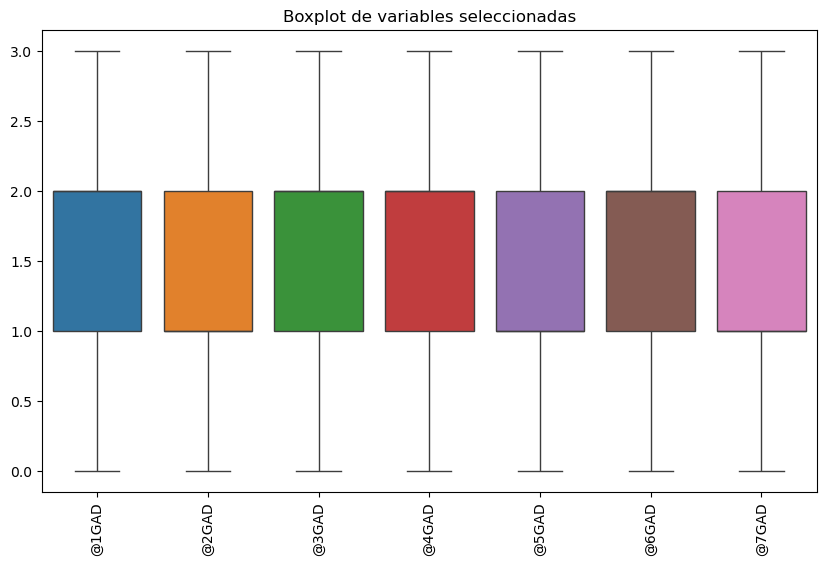

,@1GAD,@2GAD,@3GAD,@4GAD,@5GAD,@6GAD,@7GAD
count,7819.000000,7819.000000,7819.000000,7819.000000,7819.000000,7819.000000,7819.000000
mean,1.592275,1.400563,1.714669,1.592382,1.219849,1.638061,1.451592
std,0.765074,0.782208,0.798152,0.840968,0.860363,0.832146,0.921616
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000
75%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [13]:
# Lista de columnas que quieres graficar
columnas_especificas = ['@1GAD', '@2GAD', '@3GAD','@4GAD','@5GAD','@6GAD','@7GAD']

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[columnas_especificas])
plt.xticks(rotation=90)
plt.title("Boxplot de variables seleccionadas")
plt.show()

df[columnas_especificas ].describe()

### Análisis del gráfico

Escala del Trastorno de Ansiedad Generalizada (GAD-7),  aunque diseñada inicialmente para la detección y medida de la severidad del trastorno de ansiedad generalizada, también posee buenas características operativas para el trastorno de ansiedad social. 

| Valor | Significado                 |
| ----- | --------------------------- |
| 0     | Nunca / Nada                |
| 1     | Varios días                 |
| 2     | Más de la mitad de los días |
| 3     | Casi todos los días         |

Los ítems son:

@1GAD – Sentirse nervioso, ansioso o al límite

@2GAD – No poder dejar de preocuparse o controlar la preocupación

@3GAD – Preocuparse demasiado por diferentes cosas

@4GAD – Dificultad para relajarse

@5GAD – Estar tan inquieto que es difícil quedarse quieto

@6GAD – Irritarse o enojarse fácilmente

@7GAD – Sentir miedo de que algo malo vaya a pasar


En el **gráfico** se puede observar que no hay valores atípicos. Otra observación es que se muestra una gran simetría concentrada en la media de los datos.

### Análisis estadístico

**Rango:** 0–3 → Todos los datos respetan la escala.

**Medias:** Entre 1.21 y 1.71, lo que indica síntomas de ansiedad leves a moderados en promedio.

**Mayor frecuencia:**
> @3GAD (1.71) – Preocuparse demasiado
> @1GAD y @4GAD (1.59) – Sensación de nerviosismo y dificultad para relajarse

**Menor frecuencia:**
> @5GAD (1.21) – Inquietud motora es menos común.

**Medianas (50%):** Predominan valores 1–2 → “varios días” a “más de la mitad de los días”. Esto sugiere ansiedad presente, pero no severa en la mayoría.

**Dispersión (std 0.76–0.92):** Moderada → hay individuos con ansiedad mínima y otros con niveles altos (máximo 3).

Conclusiones descriptivas**
* La población presenta ansiedad leve a moderada como tendencia central.
* Preocupación excesiva y nerviosismo/dificultad para relajarse son los síntomas más reportados.
* Inquietud motora es el menos frecuente, consistente con ansiedad predominantemente cognitiva.
* El bloque es coherente y sin valores atípicos artificiales, listo para análisis o modelado.

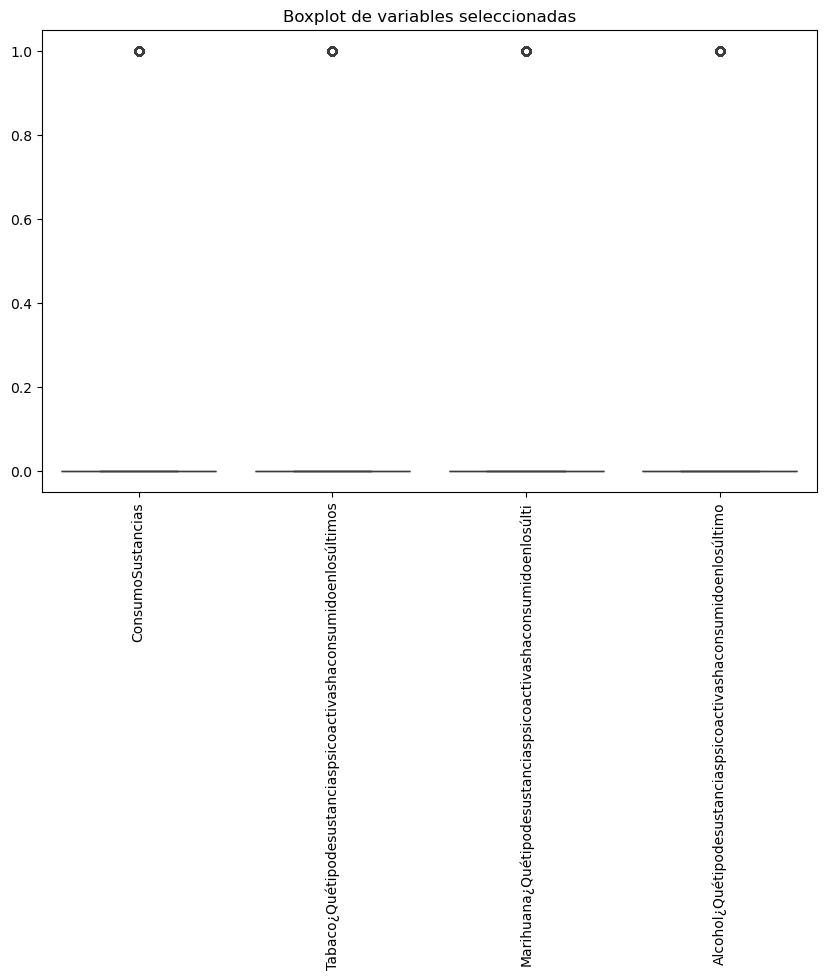

,ConsumoSustancias,Tabaco¿Quétipodesustanciaspsicoactivashaconsumidoenlosúltimos,Marihuana¿Quétipodesustanciaspsicoactivashaconsumidoenlosúlti,Alcohol¿Quétipodesustanciaspsicoactivashaconsumidoenlosúltimo
count,7819.000000,7819.000000,7819.000000,7819.000000
mean,0.229697,0.097327,0.032613,0.211536
std,0.420665,0.296422,0.177632,0.408424
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [14]:
# Lista de columnas que quieres graficar
columnas_especificas = ['ConsumoSustancias', 'Tabaco¿Quétipodesustanciaspsicoactivashaconsumidoenlosúltimos',
                        'Marihuana¿Quétipodesustanciaspsicoactivashaconsumidoenlosúlti',
                        'Alcohol¿Quétipodesustanciaspsicoactivashaconsumidoenlosúltimo']

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[columnas_especificas])
plt.xticks(rotation=90)
plt.title("Boxplot de variables seleccionadas")
plt.show()

df[columnas_especificas ].describe()


### Análisis del gráfico
En este caso las siguientes variables solo tenían 2 valores posibles: 0 para indicar **No** y 1 para indicar **Sí**.

Los valores son coherentes y acorde a los rangos esperados.


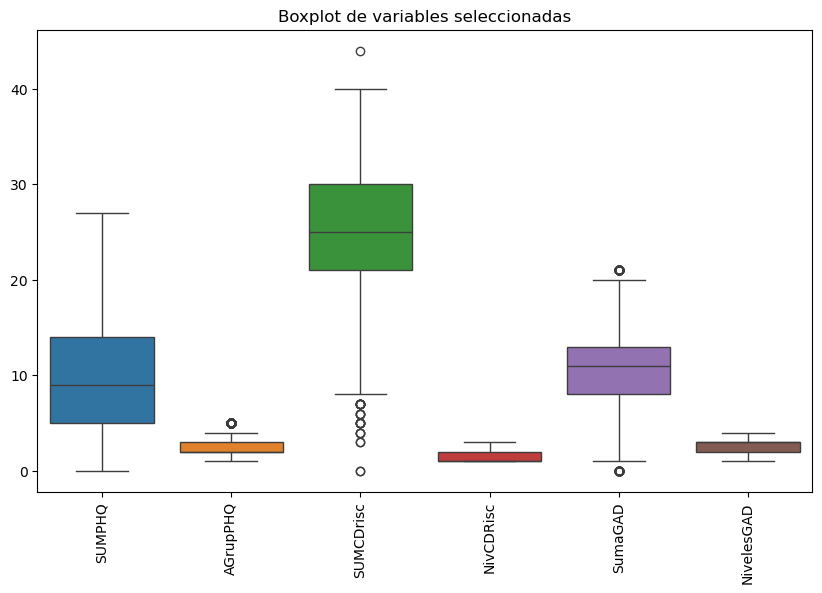

,SUMPHQ,AGrupPHQ,SUMCDrisc,NivCDRisc,SumaGAD,NivelesGAD
count,7819.000000,7819.000000,7819.000000,7819.000000,7819.000000,7819.000000
mean,10.024939,2.588822,25.309375,1.424990,10.606983,2.704949
std,5.923471,1.179419,6.602021,0.568729,4.185963,0.846669
min,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
25%,5.000000,2.000000,21.000000,1.000000,8.000000,2.000000
50%,9.000000,2.000000,25.000000,1.000000,11.000000,3.000000
75%,14.000000,3.000000,30.000000,2.000000,13.000000,3.000000
max,27.000000,5.000000,44.000000,3.000000,21.000000,4.000000


In [15]:
# Lista de columnas que quieres graficar
columnas_especificas = ['SUMPHQ','AGrupPHQ','SUMCDrisc','NivCDRisc','SumaGAD','NivelesGAD',]

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[columnas_especificas])
plt.xticks(rotation=90)
plt.title("Boxplot de variables seleccionadas")
plt.show()

df[columnas_especificas ].describe()



### Análisis del gráfico
Se observan valores atípicos en la agrupación de PHQ (Basada en la suma de puntos PHQ); en suma de puntos CD RISC y en suma de puntos de GAD; Estos aunque son atípicos es normal debido a la suma de los puntos en preguntas respondidas y no presentan error artificial.


### **Variables resumen**

#### **1. `SUMPHQ`**

* **Qué es:** Suma de los 9 ítems del **PHQ-9** (0–27).
* **Media = 10.02**, **Mediana = 9** → Depresión **leve** en promedio.
* **Rangos:**

  * 0–4 → mínima
  * 5–9 → leve
  * 10–14 → moderada
  * 15–19 → moderadamente severa
  * 20–27 → severa
* **Std = 5.92** → Alta dispersión: hay individuos sin síntomas y otros con depresión severa.
* **Conclusión:** La mayoría se concentra en depresión **leve a moderada**.

---

#### **2. `AGrupPHQ`**

* **Qué es:** Categoría de depresión según el puntaje PHQ-9 (1–5).

  * 1 = Mínima
  * 2 = Leve
  * 3 = Moderada
  * 4 = Moderadamente severa
  * 5 = Severa
* **Media = 2.58** → Tendencia entre **leve y moderada**.
* **Mediana = 2** → La mitad de los estudiantes tiene depresión **leve o menor**.

---

#### **3. `SUMCDrisc`**

* **Qué es:** Suma de los 10 ítems de **CD-RISC** (0–50).
* **Media = 25.31**, **Mediana = 25** → Resiliencia **moderada**.
* **Rango:** 0–44 (ligeramente inferior al máximo teórico 50, sin errores).
* **Conclusión:** La resiliencia media es coherente con jóvenes universitarios, con presencia de casos bajos.

---

#### **4. `NivCDRisc`**

* **Qué es:** Categoría de resiliencia (1–3)

  * 1 = Baja
  * 2 = Media
  * 3 = Alta
* **Media = 1.42**, **Mediana = 1** → Predomina **resiliencia baja**.
* **Std = 0.57** → La mayoría cae entre 1 y 2, pocos llegan a alta.

---

#### **5. `SumaGAD`**

* **Qué es:** Suma de los 7 ítems de **GAD-7** (0–21).
* **Media = 10.61**, **Mediana = 11** → Ansiedad **moderada** en promedio.
* **Desviación = 4.18** → Existe un grupo con ansiedad severa.
* **Conclusión:** Preocupación significativa en la muestra.

---

#### **6. `NivelesGAD`**

* **Qué es:** Categoría de ansiedad (1–4)

  * 1 = Mínima
  * 2 = Leve
  * 3 = Moderada
  * 4 = Severa
* **Media = 2.70**, **Mediana = 3** → La mayoría tiene ansiedad **moderada**.
* **Distribución:** El percentil 75 está en 3, lo que indica que **1 de cada 4 estudiantes** puede tener ansiedad severa o cercana a severa.

---

### **Conclusiones globales del bloque**

1. **Depresión (PHQ-9):** Predominio leve-moderado, con minoría en rangos severos.
2. **Resiliencia (CD-RISC):** Media-baja, indicando vulnerabilidad emocional ante estrés académico/social.
3. **Ansiedad (GAD-7):** Predominio moderado, consistente con población universitaria en contextos de estrés.
4. Las variables categóricas (`AGrupPHQ`, `NivCDRisc`, `NivelesGAD`) están bien distribuidas para segmentar riesgo psicológico.



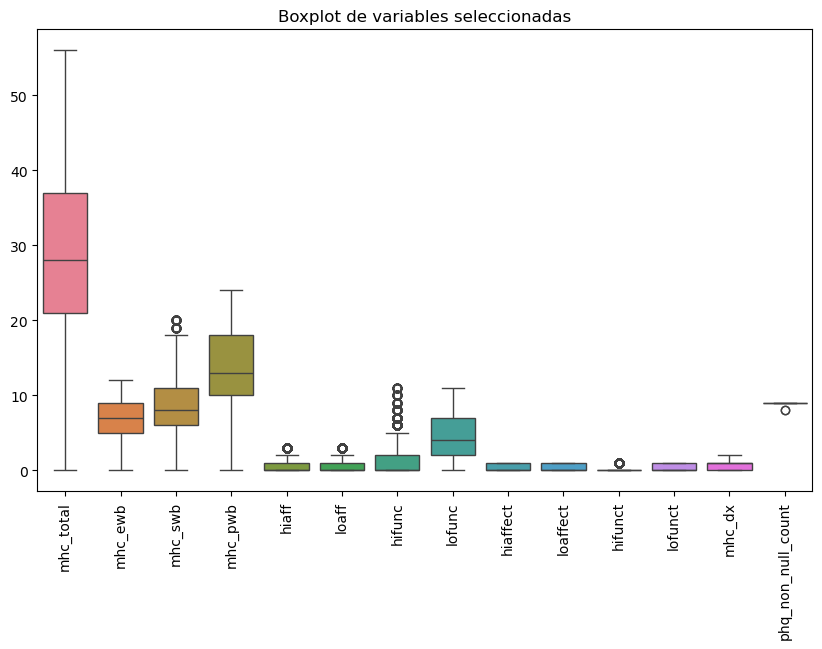

,mhc_total,mhc_ewb,mhc_swb,mhc_pwb,hiaff,loaff,hifunc,lofunc,hiaffect,loaffect,hifunct,lofunct,mhc_dx,phq_non_null_count
count,7819.000000,7819.000000,7819.000000,7819.000000,7819.000000,7819.000000,7819.000000,7819.000000,7819.00000,7819.000000,7819.000000,7819.000000,7819.000000,7819.000000
mean,28.759560,6.986699,8.329070,13.443791,0.460161,0.780535,1.447883,4.614784,0.27446,0.413608,0.067656,0.376902,0.773884,8.999744
std,10.541722,2.727559,3.852126,5.165588,0.851942,1.069675,2.157981,3.130441,0.44627,0.492511,0.251170,0.484641,0.545714,0.015992
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,8.000000
25%,21.000000,5.000000,6.000000,10.000000,0.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,9.000000
50%,28.000000,7.000000,8.000000,13.000000,0.000000,0.000000,0.000000,4.000000,0.00000,0.000000,0.000000,0.000000,1.000000,9.000000
75%,37.000000,9.000000,11.000000,18.000000,1.000000,1.000000,2.000000,7.000000,1.00000,1.000000,0.000000,1.000000,1.000000,9.000000
max,56.000000,12.000000,20.000000,24.000000,3.000000,3.000000,11.000000,11.000000,1.00000,1.000000,1.000000,1.000000,2.000000,9.000000


In [16]:
# Lista de columnas que quieres graficar
columnas_especificas = ['mhc_total', 'mhc_ewb','mhc_swb','mhc_pwb','hiaff','loaff',
                        'hifunc','lofunc','hiaffect','loaffect','hifunct','lofunct',
                        'mhc_dx','phq_non_null_count']

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[columnas_especificas])
plt.xticks(rotation=90)
plt.title("Boxplot de variables seleccionadas")
plt.show()

df[columnas_especificas ].describe()

### **Variables resumen del MHC**

#### **1. `mhc_total`**

* **Qué es:** Suma total de los 14 ítems MHC (0–56).
* **Media = 28.76**, **Mediana = 28**, **Std = 10.54**
  → Bienestar **moderado**, con dispersión amplia.
* **Mínimo = 0, Máximo = 56**
  → Hay casos con bienestar muy bajo y otros con puntaje perfecto.

#### **2. Componentes**

* **`mhc_ewb`** (Emotional Well-Being)

  * Rango 0–12, Media = 6.99 → bienestar emocional **moderado**.
* **`mhc_swb`** (Social Well-Being)

  * Rango 0–20, Media = 8.33 → bienestar social **moderado-bajo**.
* **`mhc_pwb`** (Psychological Well-Being)

  * Rango 0–24, Media = 13.44 → bienestar psicológico **moderado**.

*El componente más débil sigue siendo el social.*

---

### **Variables de alto/bajo bienestar (binarias o conteos)**

* **`hiaff` / `loaff`** – Hedonic High / Low Affect

  * Valores 0–3 (conteo de ítems de afecto alto o bajo)
  * Media `hiaff` = 0.46 (baja frecuencia de emociones positivas extremas)
  * Media `loaff` = 0.78 (emociones negativas más frecuentes).

* **`hifunc` / `lofunc`** – Functional High / Low (conteo de ítems funcionales positivos o negativos)

  * `hifunc` media = 1.45, `lofunc` media = 4.61 → predominio de **bajo funcionamiento**.
    

* **`hiaffect` / `loaffect` / `hifunct` / `lofunct`** – Variables binarias (0/1) que indican si cumplen el criterio de alto/bajo bienestar

  * Ej: `hiaffect` media = 0.27 → solo 27% reportan afecto alto.
  * `lofunct` media = 0.38 → 38% en bajo funcionamiento.

* **`mhc_dx`** – Diagnóstico de bienestar:

  * 0 = Desanimado (Languishing)
  * 1 = Moderado
  * 2 = Florecido (Flourishing)
  * Media = 0.77 → la mayoría **moderada o baja**.

* **`phq_non_null_count`** – Conteo de ítems PHQ respondidos por fila

  * Media ≈ 9 → Casi todas las filas tienen el bloque PHQ completo.

---

### **Conclusiones descriptivas finales**

1. **Bienestar total**: Predominio **moderado**, con un 25% en niveles bajos (≤21 puntos).
2. **Dimensiones**:

   * Psicológico > Emocional > Social (el social es el más débil).
3. **Distribución de diagnóstico (`mhc_dx`)**:

   * Mayoría en **moderado**, pocos alcanzan “floreciente” (2).
4. **Indicadores binarios** (`hiaffect`, `lofunct`) muestran que la proporción con alto bienestar es **baja**, y los de bajo funcionamiento rondan el 38%.
5. **Dataset listo para modelado**, ya que respeta rangos y no tiene valores atípicos artificiales.

---

### Datos listos para analizar variables potenciales para entrenamiento de modelos

In [17]:
# Guardar en CSV sin índice
df.to_csv("4DatasetListo.csv", index=False, encoding='utf-8')